# imports

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.display import HTML

In [5]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    sns.set()
jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


# load data

In [6]:
data_raw = pd.read_csv('../data/clients.csv')

Dados coletados do dataset "comunidadeds" atrávez do software Dbeaver onde 3 dataframes com informações foram unidos com base no id de cada usuário

Data collected in the "comunidadeds" database by Dbeaver software, where three dataframes have been merged using each user's id

In [7]:
data_raw.head()

,id,gender,age,region_code,policy_sales_channel,id.1,previously_insured,annual_premium,vintage,response,id.2,driving_license,vehicle_age,vehicle_damage
0,1,Male,44,28.0,26.0,1,0,40454.0,217,1,1,1,> 2 Years,Yes
1,2,Male,76,3.0,26.0,2,0,33536.0,183,0,2,1,1-2 Year,No
2,3,Male,47,28.0,26.0,3,0,38294.0,27,1,3,1,> 2 Years,Yes
3,4,Male,21,11.0,152.0,4,1,28619.0,203,0,4,1,< 1 Year,No
4,5,Female,29,41.0,152.0,5,1,27496.0,39,0,5,1,< 1 Year,No


**Descartando as columnas de "id" redundantes que foram deixadas pelo método merge**

**drop id's columns left by the datasets merge**

In [8]:
data_raw = data_raw.drop(columns=['id.1','id.2'])

In [9]:
data_raw.columns

Index(['id', 'gender', 'age', 'region_code', 'policy_sales_channel',
       'previously_insured', 'annual_premium', 'vintage', 'response',
       'driving_license', 'vehicle_age', 'vehicle_damage'],
      dtype='object')

In [10]:
data_raw = data_raw[['id', 'gender', 'age', 'region_code', 'policy_sales_channel',
       'previously_insured', 'annual_premium', 'vintage',
       'driving_license', 'vehicle_age', 'vehicle_damage','response']]

**Datasets dimensions**

In [11]:
data_raw.shape

(381109, 12)

# Checking data types

In [12]:
data_raw.dtypes

id                        int64
gender                   object
age                       int64
region_code             float64
policy_sales_channel    float64
previously_insured        int64
annual_premium          float64
vintage                   int64
driving_license           int64
vehicle_age              object
vehicle_damage           object
response                  int64
dtype: object

# Checking NA values

In [13]:
data_raw.isnull().sum()

id                      0
gender                  0
age                     0
region_code             0
policy_sales_channel    0
previously_insured      0
annual_premium          0
vintage                 0
driving_license         0
vehicle_age             0
vehicle_damage          0
response                0
dtype: int64

# Descriptive Statistical

'id': numerical statistics

'gender': categorical statistics

'age': numerical statistics

'region_code': agroup e and count ids by region 

'policy_sales_channel': categorical statistics

'previously_insured': categorical statistics

'annual_premium': numerical statistics

'vintage': numerical statistics

'response': categorical statistics

'driving_license': categorical statistics

'vehicle_age': numerical statistics


 'vehicle_damage': categorical statistics

In [14]:
df1 = data_raw.copy()

In [15]:
num_atributtes = df1[['id','age','annual_premium', 'vintage']]
cat_atributtes = df1[['gender','policy_sales_channel','region_code','previously_insured','driving_license','vehicle_damage','vehicle_age','response']]

**Separando os dados em categoricos ou númericos para análise**

**Dividing the data into categorical or numerical to analysis**

## Numerical statistics

In [16]:
num_statistics = num_atributtes.agg(['max','min','mean','median','std','skew','kurtosis']).T
num_statistics['range'] = num_statistics['max'] - num_statistics['min']
num_statistics = num_statistics[['max','min','range','mean','median','std','skew','kurtosis']]
num_statistics

,max,min,range,mean,median,std,skew,kurtosis
id,381109.0,1.0,381108.0,190555.000000,190555.0,110016.836208,9.443274e-16,-1.200000
age,85.0,20.0,65.0,38.822584,36.0,15.511611,6.725390e-01,-0.565655
annual_premium,540165.0,2630.0,537535.0,30564.389581,31669.0,17213.155057,1.766087e+00,34.004569
vintage,299.0,10.0,289.0,154.347397,154.0,83.671304,3.029517e-03,-1.200688


<AxesSubplot:xlabel='response', ylabel='age'>

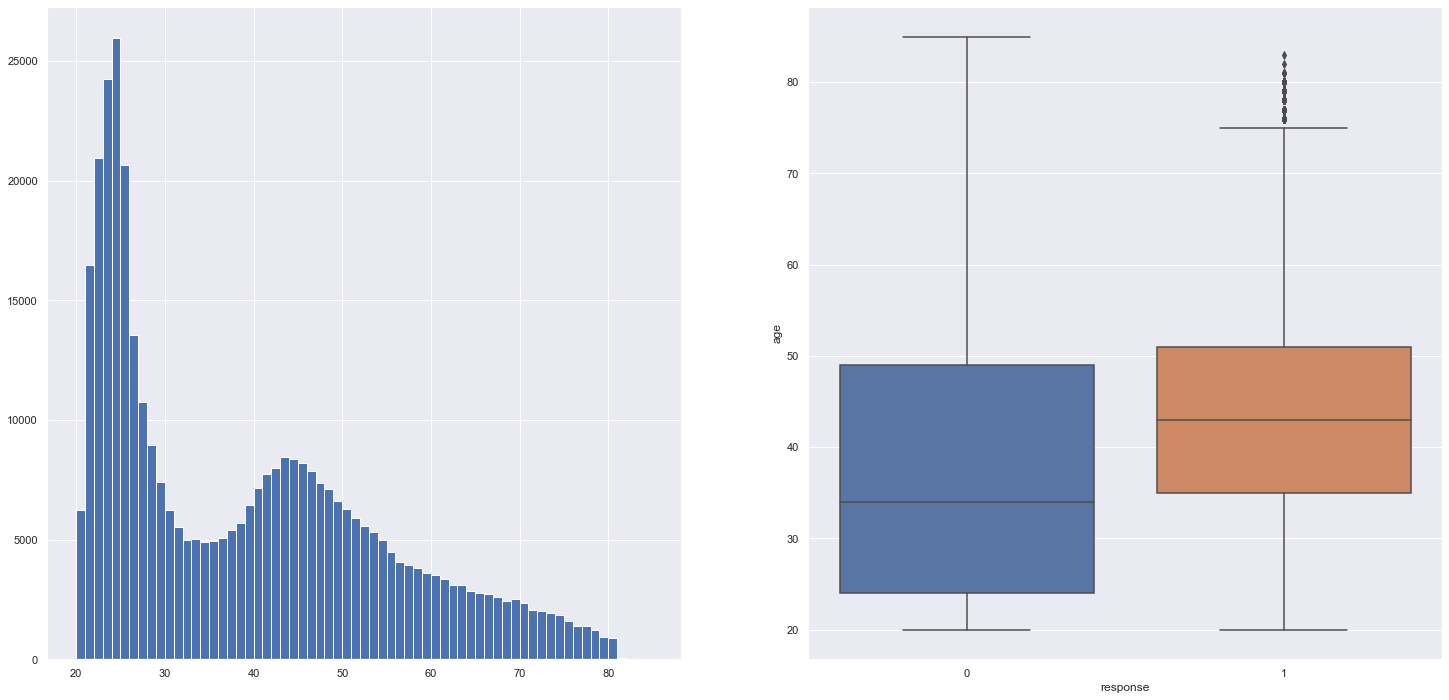

In [17]:
plt.subplot(1,2,1)
num_atributtes['age'].hist(bins=65)
plt.subplot(1,2,2)
sns.boxplot(x='response',y='age',data=df1)

<AxesSubplot:xlabel='response', ylabel='annual_premium'>

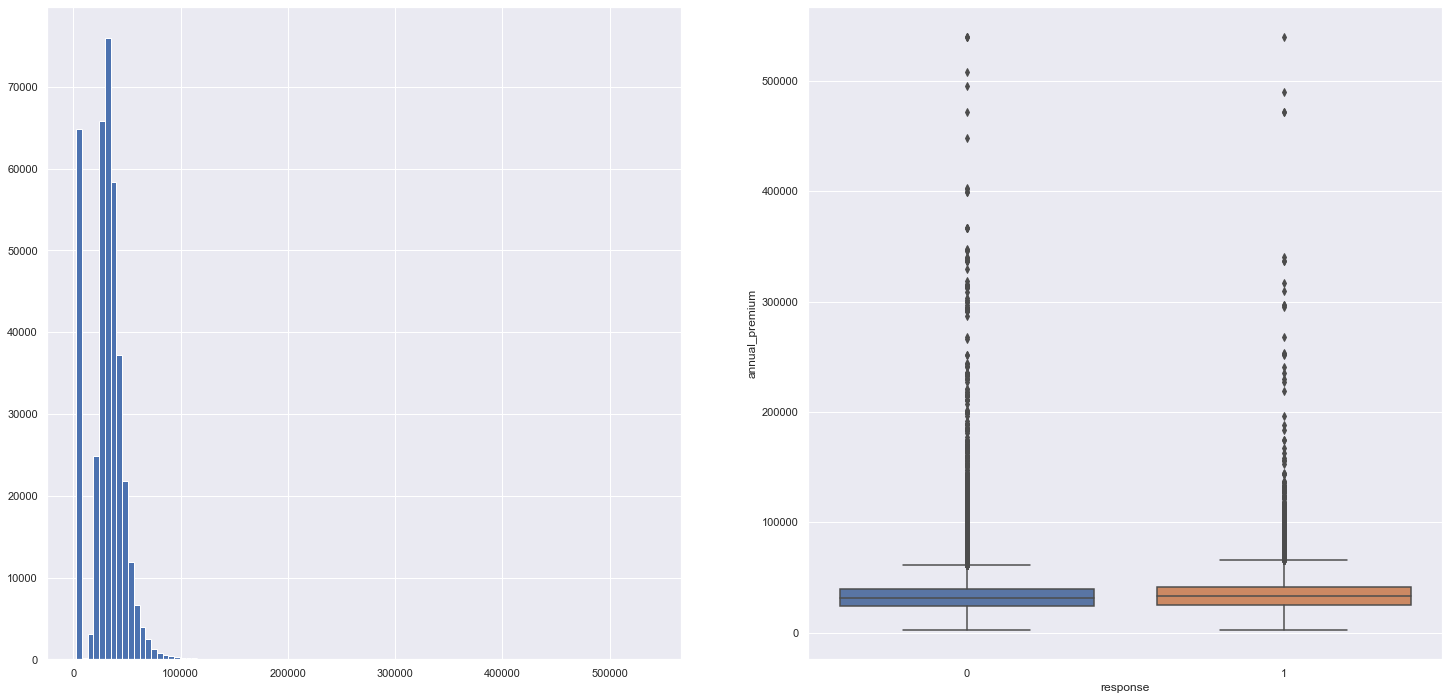

In [18]:
plt.subplot(1,2,1)
num_atributtes['annual_premium'].hist(bins=100)
plt.subplot(1,2,2)
sns.boxplot(x='response',y='annual_premium',data=df1)

<AxesSubplot:xlabel='response', ylabel='vintage'>

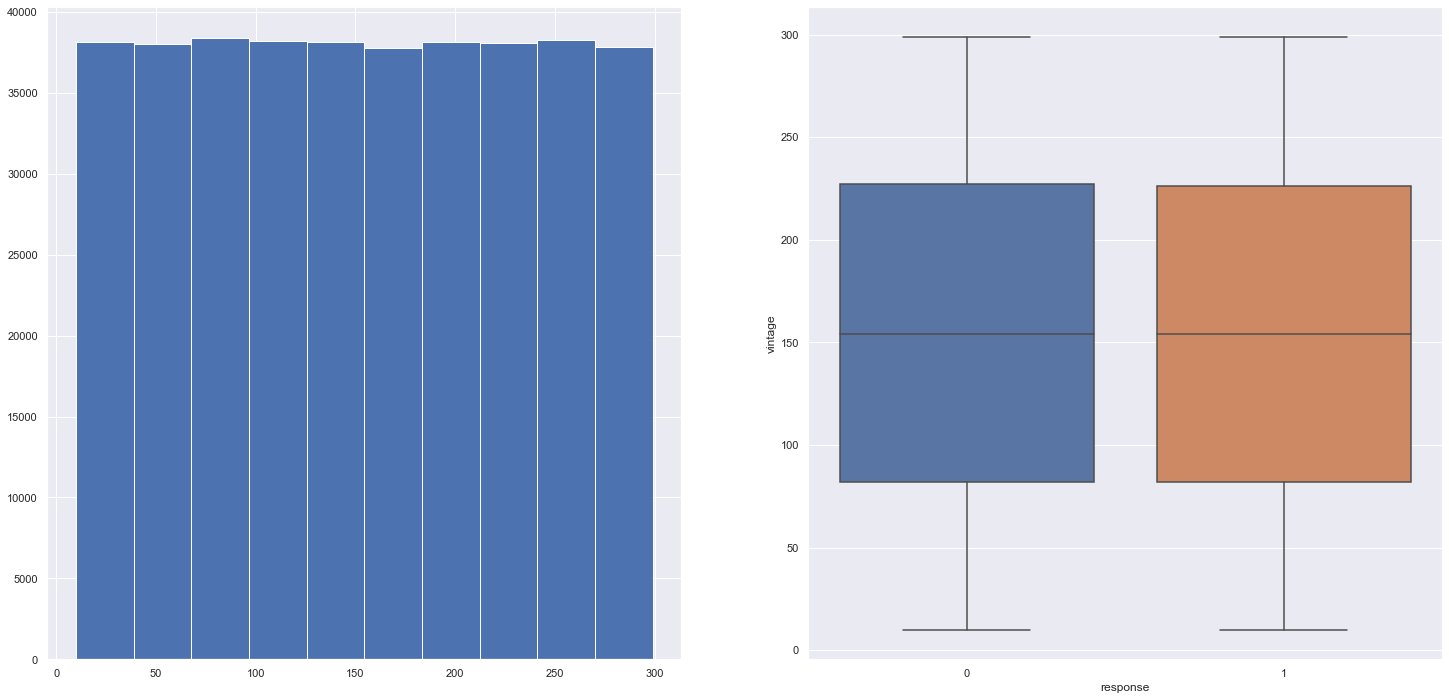

In [19]:
plt.subplot(1,2,1)
num_atributtes['vintage'].hist()
plt.subplot(1,2,2)
sns.boxplot(x='response',y='vintage',data=df1)

# Categorical statistics

In [20]:
cat_atributtes.head()

,gender,policy_sales_channel,region_code,previously_insured,driving_license,vehicle_damage,vehicle_age,response
0,Male,26.0,28.0,0,1,Yes,> 2 Years,1
1,Male,26.0,3.0,0,1,No,1-2 Year,0
2,Male,26.0,28.0,0,1,Yes,> 2 Years,1
3,Male,152.0,11.0,1,1,No,< 1 Year,0
4,Female,152.0,41.0,1,1,No,< 1 Year,0


In [21]:
cat_atributtes.apply(lambda x: x.unique().shape[0])

gender                    2
policy_sales_channel    155
region_code              53
previously_insured        2
driving_license           2
vehicle_damage            2
vehicle_age               3
response                  2
dtype: int64

In [22]:
resp = cat_atributtes[['response']].value_counts().reset_index()
resp["%"] =round( resp[0]/resp[0].sum()*100,2)
resp.columns=['response','count','%']
resp

,response,count,%
0,0,334399,87.74
1,1,46710,12.26


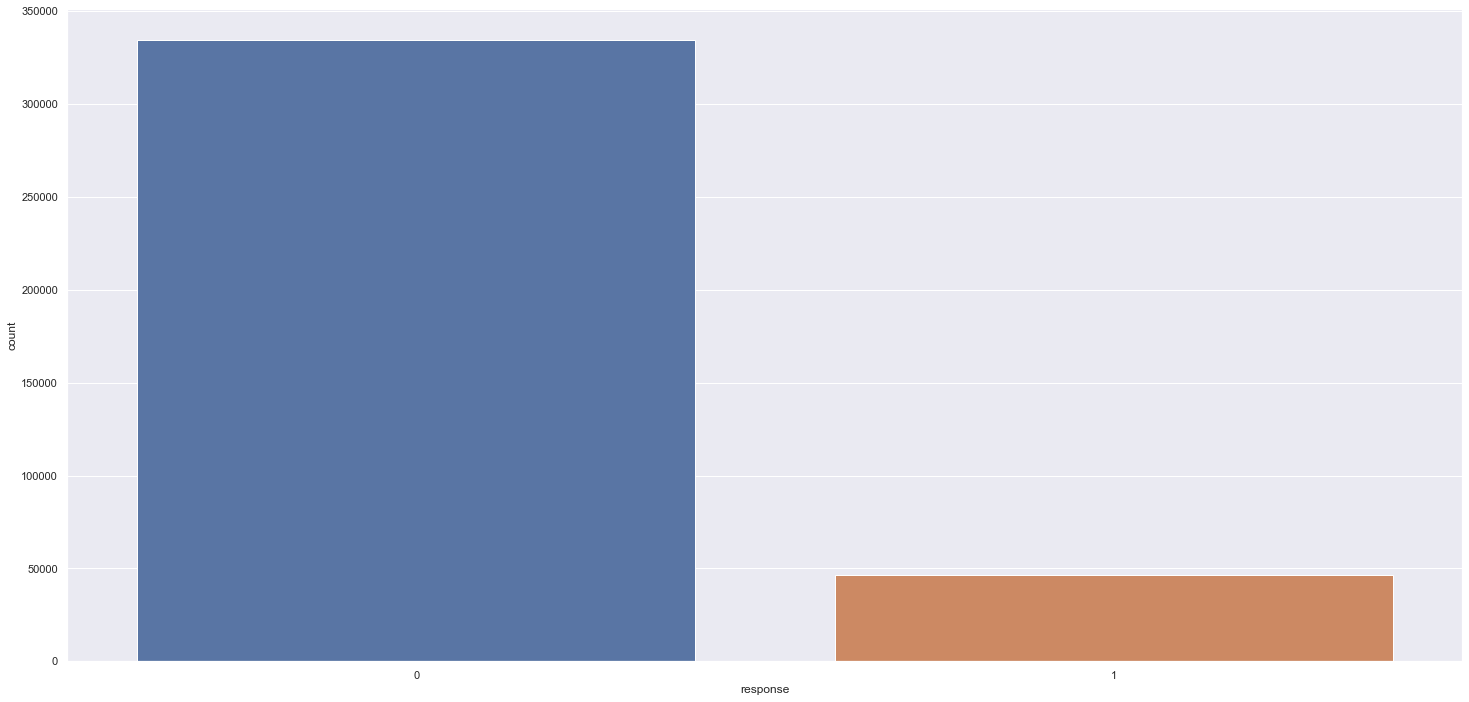

In [23]:
sns.barplot(x='response',y='count',data=resp);

**Variável resposta está desbalanceada**

**Target variable is unbalanced**

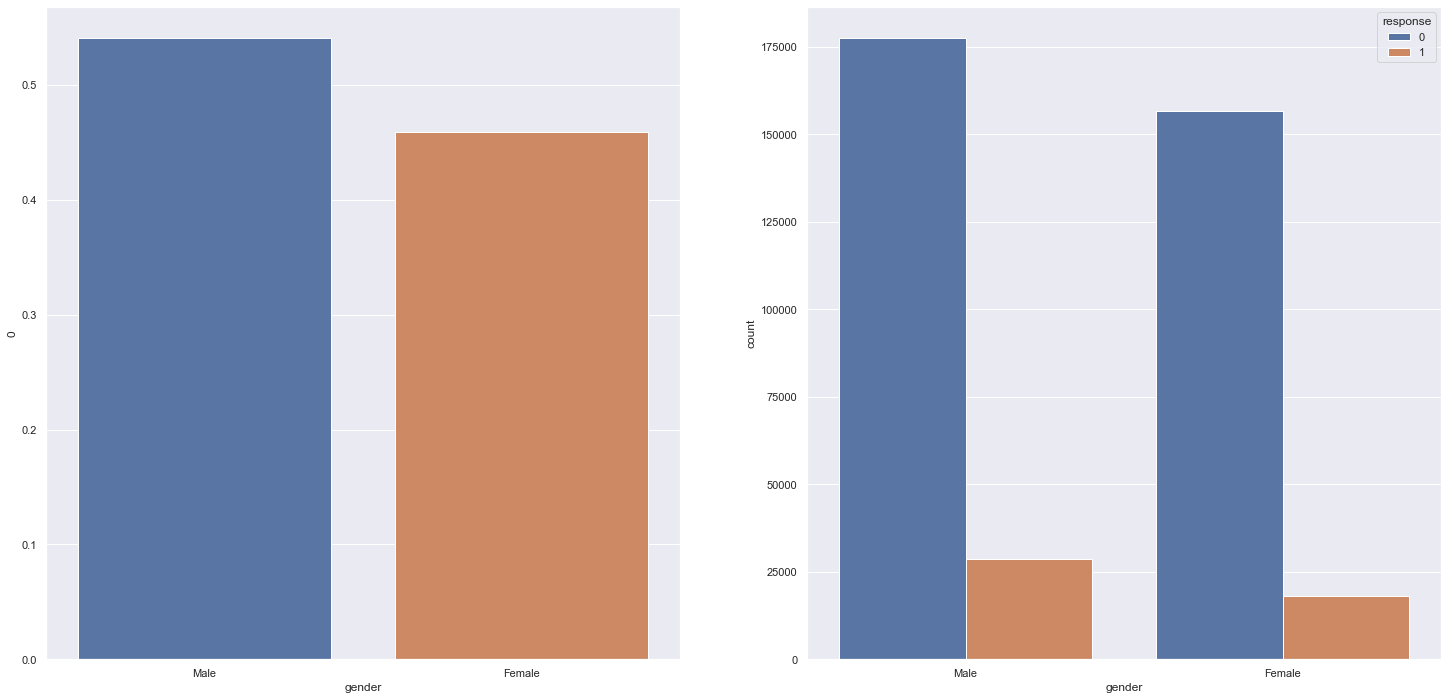

In [24]:
plt.subplot(1,2,1)
sns.barplot(x='gender',y=0,data=cat_atributtes[['gender']].value_counts(normalize=True).reset_index())
plt.subplot(1,2,2)
sns.countplot(x='gender',hue='response',data=cat_atributtes);

In [25]:
rep_gen = cat_atributtes[['response','gender']].value_counts().reset_index()
rep_gen['_%'] = (round(rep_gen[0]/rep_gen[0].sum()*100,2))
rep_gen

,response,gender,0,_%
0,0,Male,177564,46.59
1,0,Female,156835,41.15
2,1,Male,28525,7.48
3,1,Female,18185,4.77


**A variável genêro apresenta um pequeno desbalanço tendo em sua maioria pessoas do sexo masculino, mas apresenta proporção parecida em relação a variável resposta**

**The gender variable shows a small imbalance having people from masculine sex as majority, but shows similar proportion on the target variable**

<AxesSubplot:>

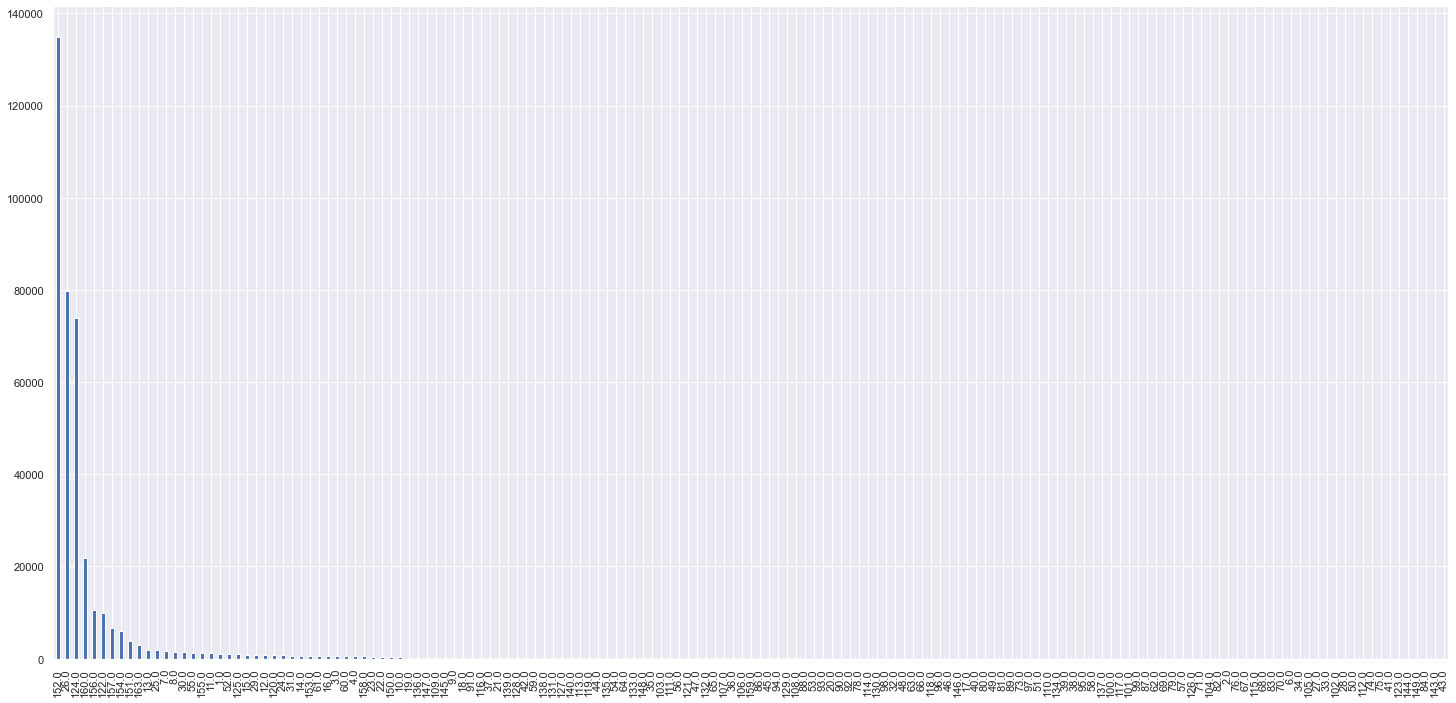

In [26]:
cat_atributtes['policy_sales_channel'].value_counts().plot(kind='bar')

In [27]:
cat_atributtes['policy_sales_channel'].value_counts().reset_index()[0:10]

,index,policy_sales_channel
0,152.0,134784
1,26.0,79700
2,124.0,73995
3,160.0,21779
4,156.0,10661
5,122.0,9930
6,157.0,6684
7,154.0,5993
8,151.0,3885
9,163.0,2893


In [28]:
cat_atributtes['policy_sales_channel'].value_counts().reset_index()[0:10].sum()/len(cat_atributtes['policy_sales_channel'])

index                   0.003582
policy_sales_channel    0.919170
dtype: float64

**Dos 155 meios de contato com o clientes 10 deles contém cerca de 92 % das interações, infelizmente não temos o conhecimento sobre a natureza desses meios de contato**

**From 155 custumer contact methods, 10 of them group 92% of the interactions, unfortunately we don't have knowledge about the nature of these methods**

<AxesSubplot:xlabel='region_code', ylabel='count'>

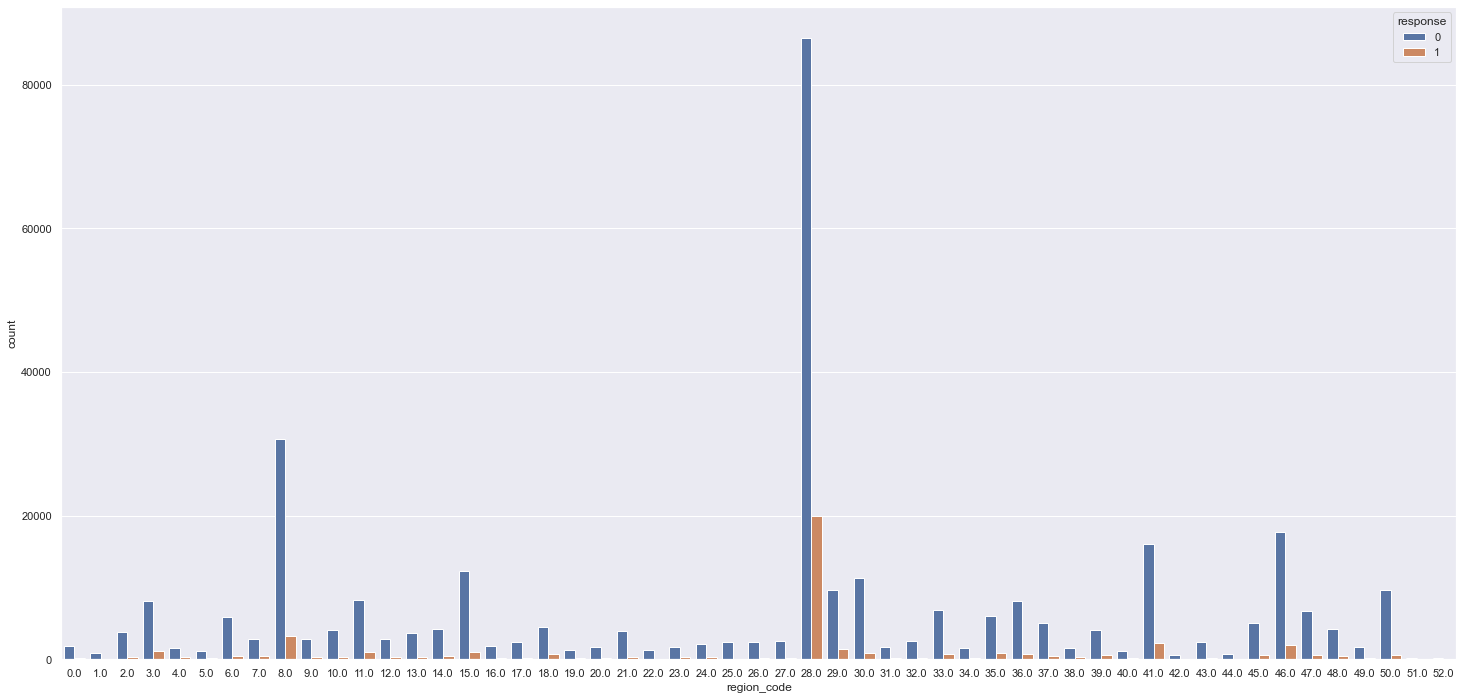

In [29]:
sns.countplot(x='region_code',data=cat_atributtes,hue='response')

In [30]:
cat_atributtes['region_code'].value_counts().reset_index()[0:10]

,index,region_code
0,28.0,106415
1,8.0,33877
2,46.0,19749
3,41.0,18263
4,15.0,13308
5,30.0,12191
6,29.0,11065
7,50.0,10243
8,3.0,9251
9,11.0,9232


In [31]:
cat_atributtes['region_code'].value_counts().reset_index()[0:10].sum()/len(cat_atributtes['region_code'])

index          0.000685
region_code    0.639171
dtype: float64

**63% dos clientes estão concentrados em 10 regiões das 52 pesquisadas**

**63% of customers are group in ten regions out of 52 surveyed**

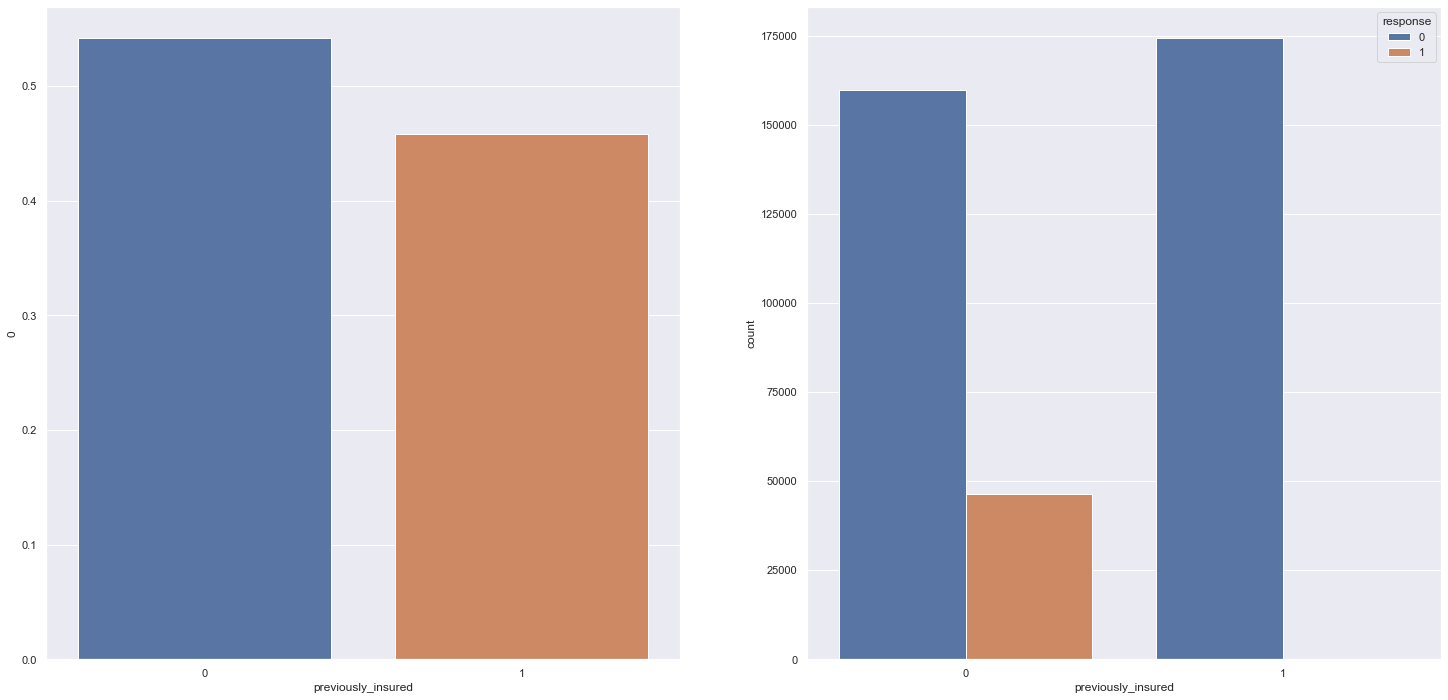

In [32]:
plt.subplot(1,2,1)
sns.barplot(x='previously_insured',y=0,data=cat_atributtes[['previously_insured']].value_counts(normalize=True).reset_index())
plt.subplot(1,2,2)
sns.countplot(x='previously_insured',hue='response',data=cat_atributtes);

In [33]:
cat_atributtes['previously_insured'].value_counts(normalize=True)*100

0    54.178988
1    45.821012
Name: previously_insured, dtype: float64

**45.8% dos clientes já possuem seguro veicular, e esses que possuem não se interresaram pelo seguro da empresa**

**45.8% of customers previously have a car insurence, and thoses have no interest in the company's insurance**

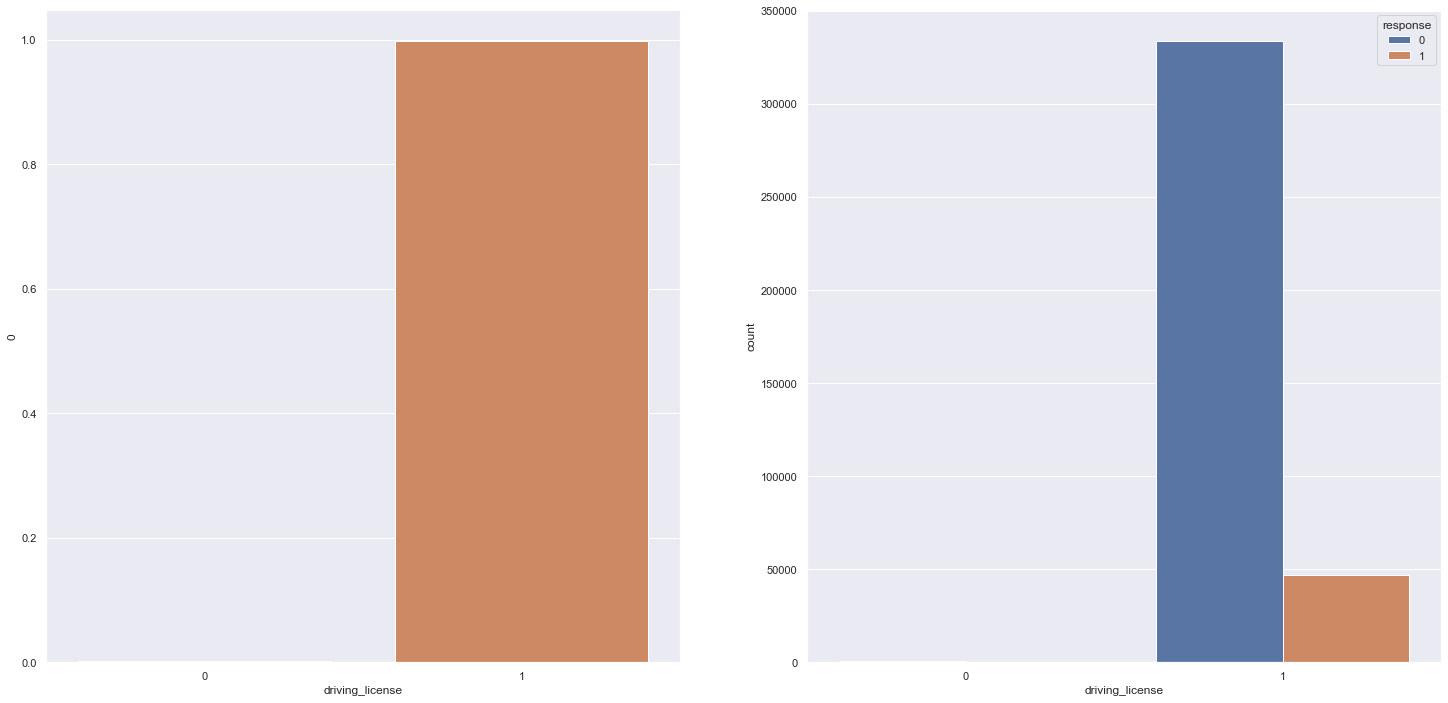

In [34]:
plt.subplot(1,2,1)
sns.barplot(x='driving_license',y=0,data=cat_atributtes[['driving_license']].value_counts(normalize=True).reset_index())
plt.subplot(1,2,2)
sns.countplot(x='driving_license',hue='response',data=cat_atributtes);

In [35]:
cat_atributtes[['driving_license','response']].groupby(['driving_license','response']).size().reset_index()

,driving_license,response,0
0,0,0,771
1,0,1,41
2,1,0,333628
3,1,1,46669


In [36]:
cat_atributtes['driving_license'].value_counts(normalize=True)*100

1    99.786938
0     0.213062
Name: driving_license, dtype: float64

**Apenas 0.21% dos clientes não possuem licença de motorista, logo pode afirmar que a coluna não tanta informação.**

**Just 0.21% of custumer have no driving license, then it can be said that the column bring no information.**

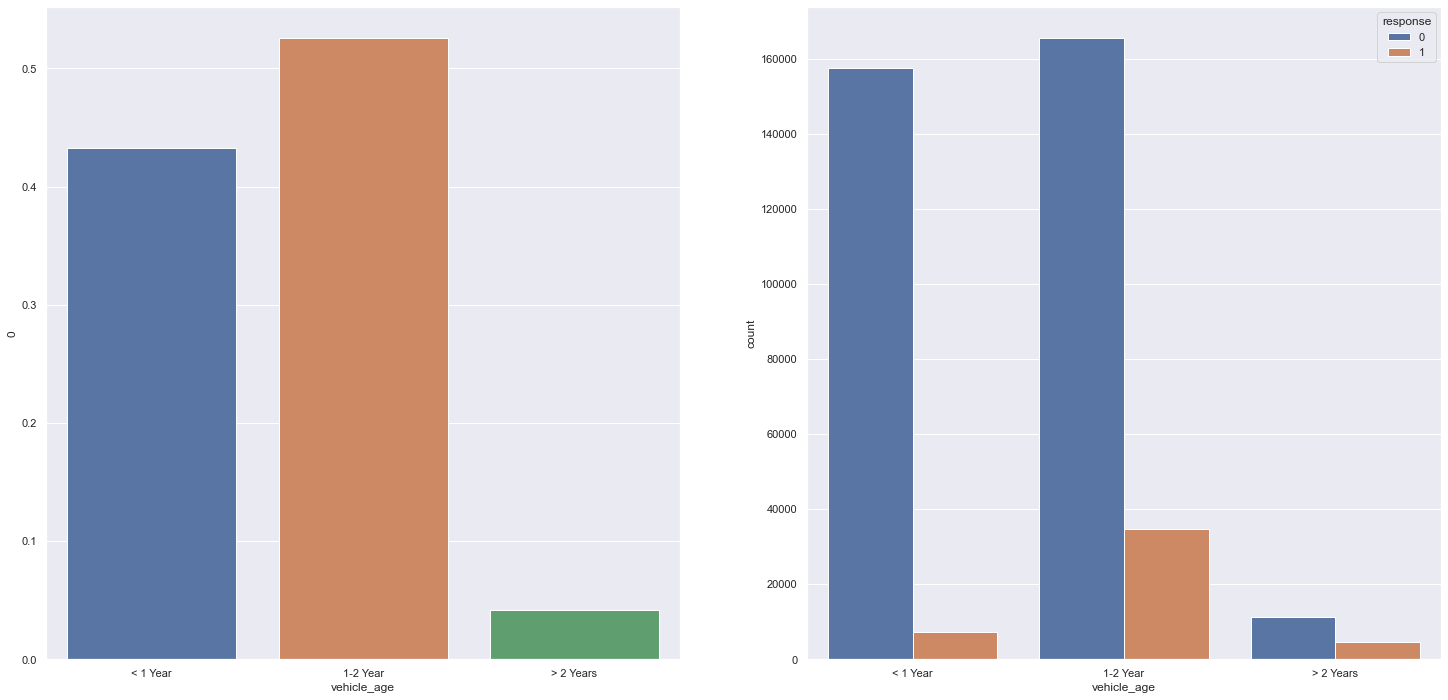

In [37]:
plt.subplot(1,2,1)
sns.barplot(x='vehicle_age',y=0,data=cat_atributtes[['vehicle_age']].value_counts(normalize=True).reset_index(),order=['< 1 Year','1-2 Year','> 2 Years'])
plt.subplot(1,2,2)
sns.countplot(x='vehicle_age',hue='response',data=cat_atributtes,order=['< 1 Year','1-2 Year','> 2 Years']);

In [38]:
veh = cat_atributtes['vehicle_age'].value_counts(normalize=True).reset_index()
veh.columns = ['vehicle_age','vehicle_age_%']
veh

,vehicle_age,vehicle_age_%
0,1-2 Year,0.525613
1,< 1 Year,0.432385
2,> 2 Years,0.042001


**Apenas 0.04% dos veiculos na pesquisa tem mais de 2 anos**

**Just 0.04% of vehicles has more than 2 years**

In [39]:
#df1.to_csv('../data/df1.csv',index=False)